## Logistic Regression Case Study

### Diabetes data set

In [21]:
#Let's start with importing necessary libraries

import os
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
os.chdir('D:/MLP_Session_26_JULY/DATASET')

In [23]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
# Checking the missing values

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
# Checking the summary statistics

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

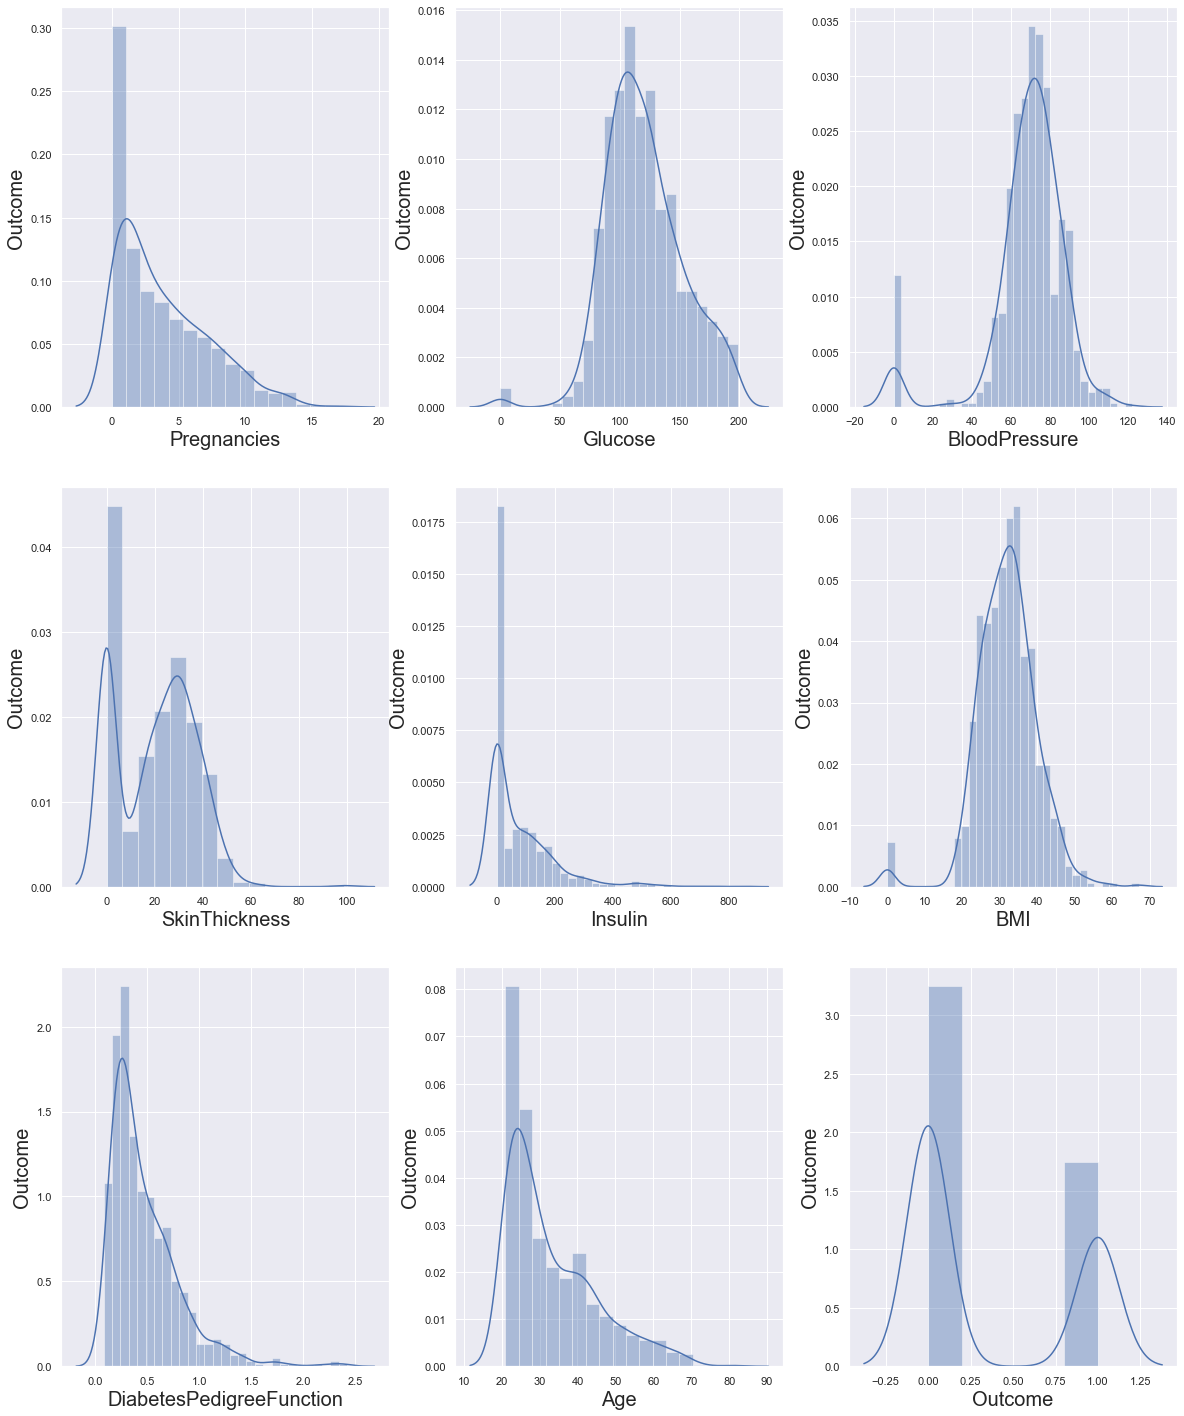

In [26]:
# looking at the distribution of the features

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1
plt.show()

In [27]:
# From the above distribution, we find that there are many variables which are skewed.
# Also, there are few columns like Glucose, Blood Pressure, Skin Thickness and Insulin where we have few records 
# as zero which is not possible. These are actually Missing values.
# So, we go for Missing value imputation

# replacing zero values with the mean of the column

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

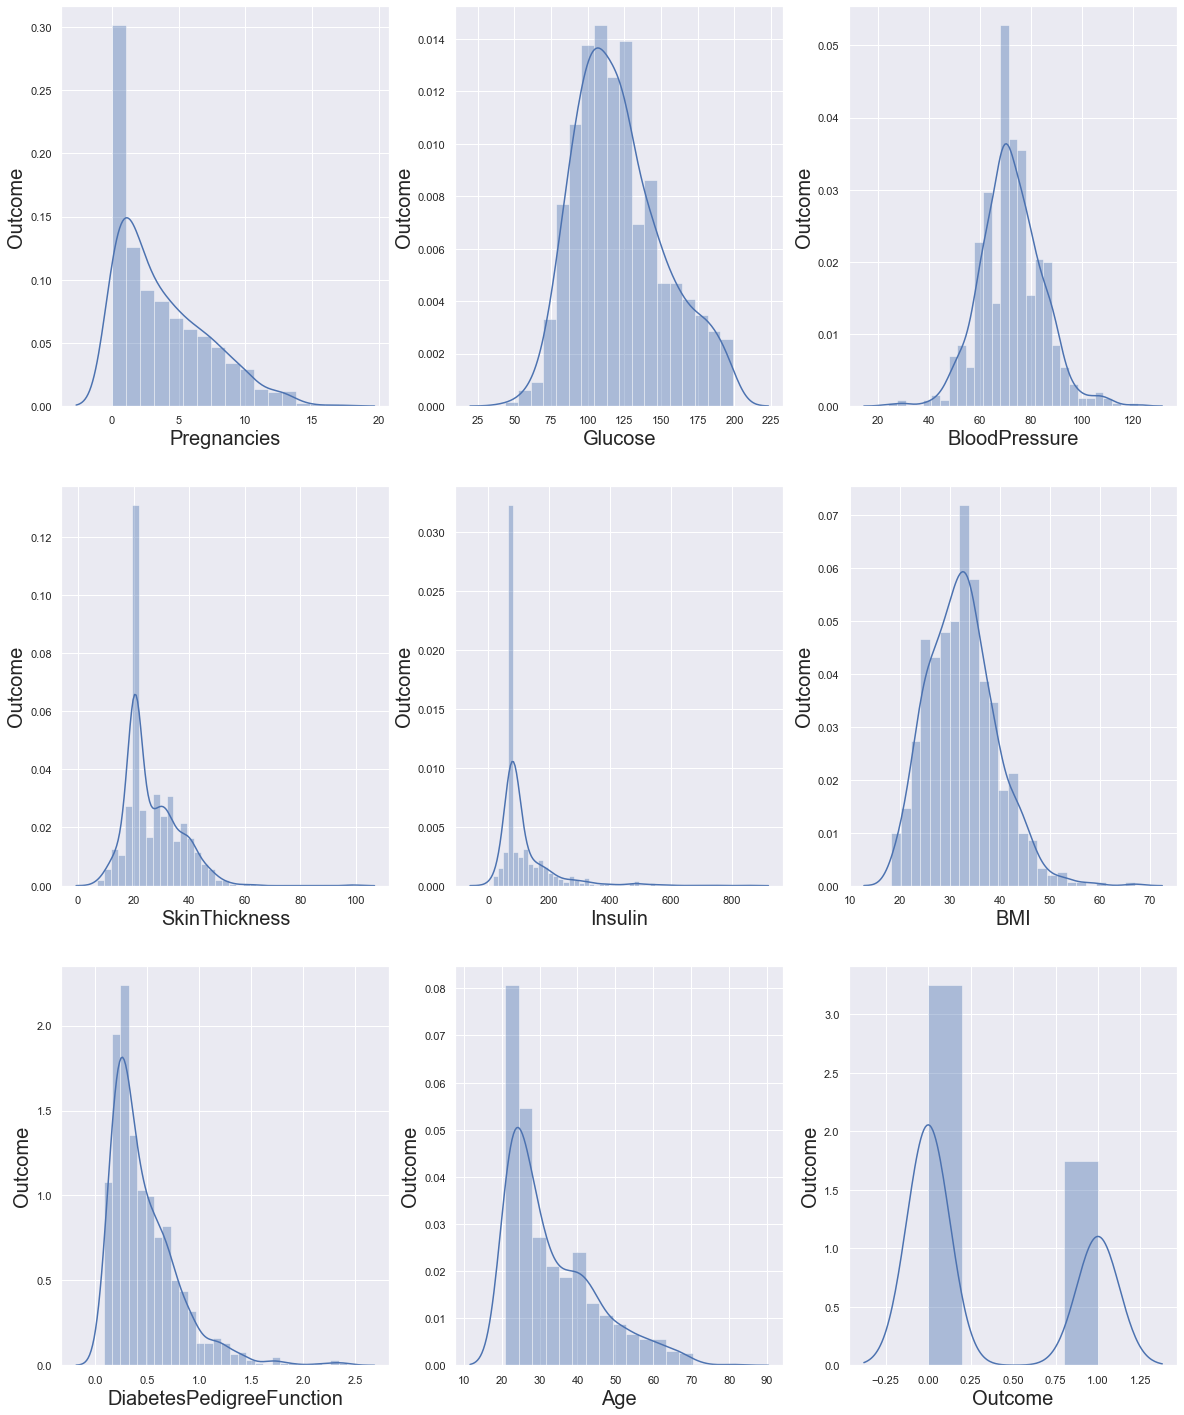

In [28]:
# looking at the distribution for every column once again

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

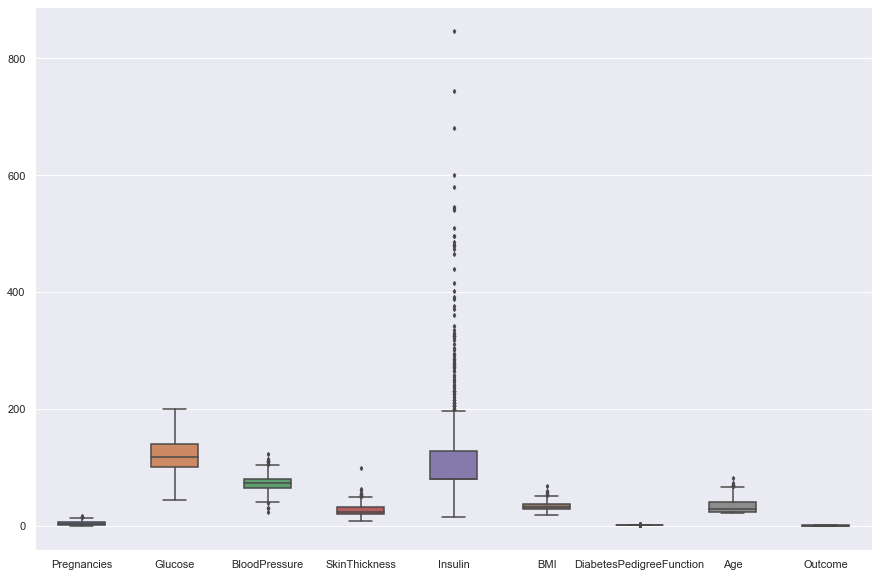

In [29]:
# Looking at the distribution for the features, we find that there are outliers.
# So we use Box Plot to detect the outliers.

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


In [30]:
# Removing the outliers using filters

q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

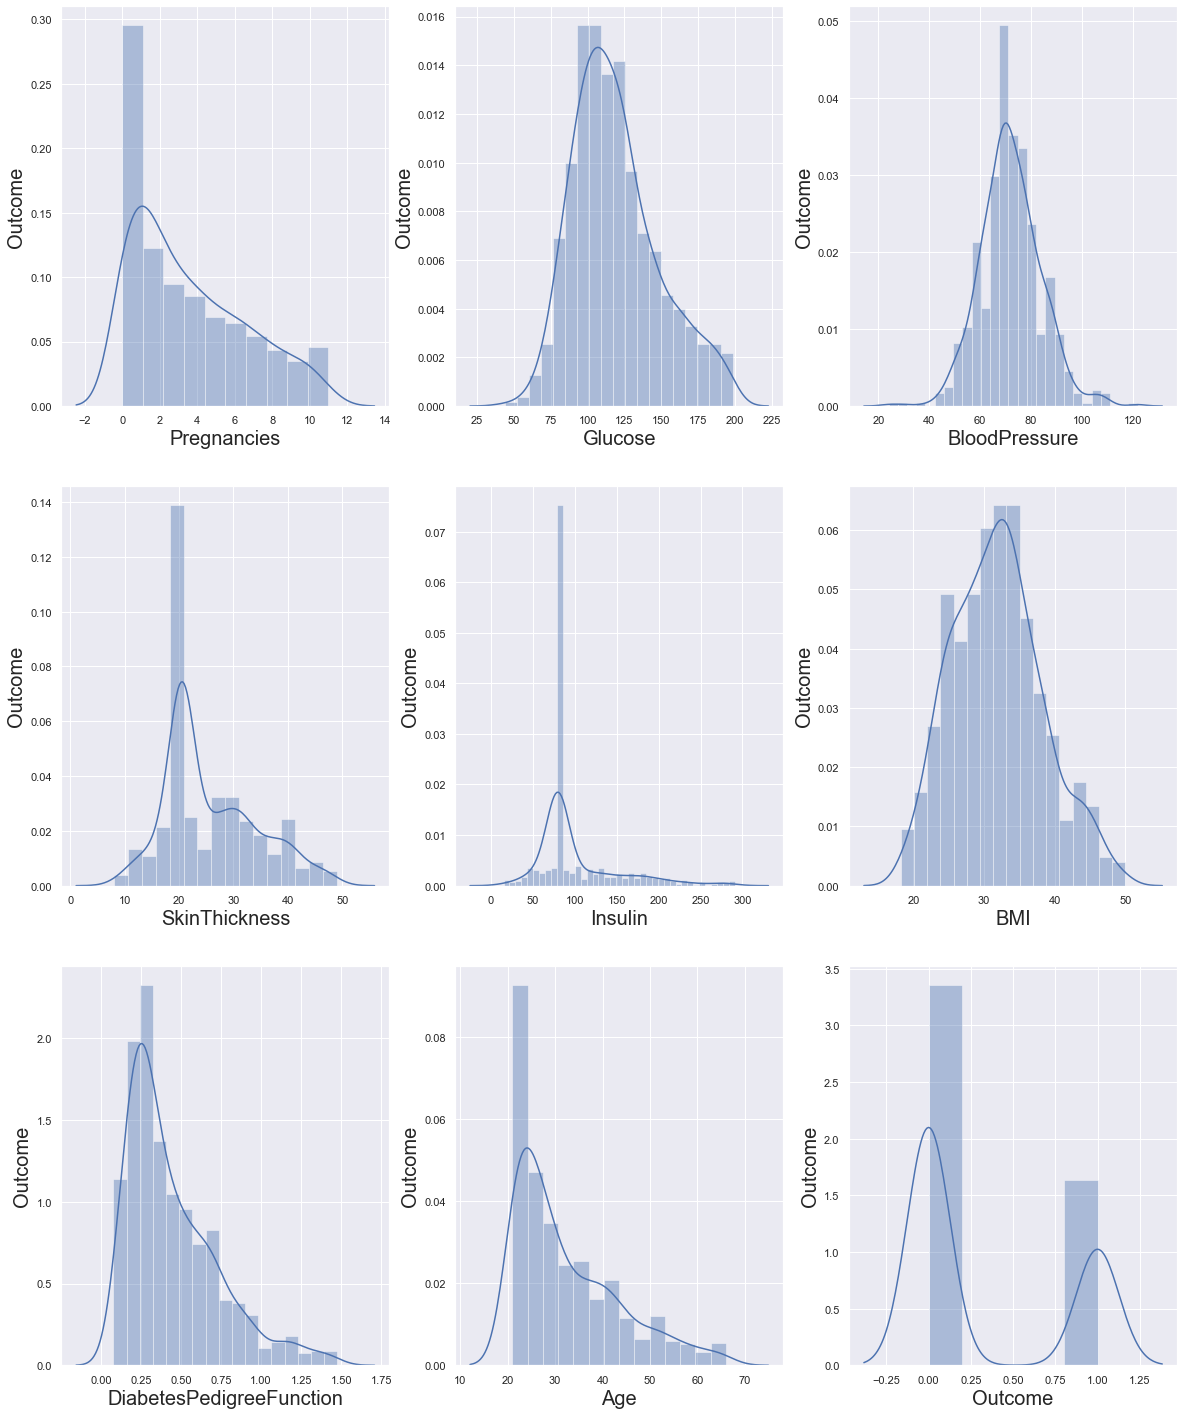

In [31]:
# Looking at the distribution of each column once again

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1
plt.show()

In [32]:
# The distribution of the data looks much better. If required we can do more data cleaning.
# Now proceeding with the Modeling

# Creating the Independent and Dependent variables set

X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [34]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
# Feature Scaling using StandardScaler
# Applicable when we have variables in different units

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [14]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [15]:
# Checking for the multicollinearity using VIF

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [16]:
# The VIF values are less than 2. So no multicollinearity present between the independent variables.

# Moving to the next step

# Creating the Train-Test split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 0)

In [17]:
y_test.shape

(192,)

In [18]:
# Fitting the Logistic Regression model

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [19]:
# Calculating the predicted value of Y

# scikit learn logistic regression

y_pred = log_reg.predict(x_test)

In [20]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
# Calculating the Accuracy using accuracy_score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.796875

In [22]:
'''
# Creating the Confusion Matrix
# Confusion Matrix
#             Pred
#            0    1
# Actual 0 [[TN, FP],
#        1 [FN, TP]]
'''
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [23]:
true_positive = conf_mat[1][1]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[0][0]


In [24]:
# Manually calculating the different metrics
# Accuracy

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.796875

In [25]:
# Recall

Recall = true_positive/(true_positive+false_negative)
Recall

0.5806451612903226

In [26]:
# Precison

Precision = true_positive/(true_positive+false_positive)
Precision

0.7346938775510204

In [27]:
# Specificity

# TN/(TN + FP)

Specificity = true_negative/(true_negative + false_positive)
Specificity

0.9

In [28]:
# F1 Score

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6486486486486487

In [29]:
# Creating the Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [30]:
'''From the Classification Report, we find
Accuracy = 0.80 
Precision = 0.73 
Recall(or Sensitivity or TPR) = 0.58 
F1-Score = 0.65 
Specificity(or TNR) = 0.9
'''

# Area Under the ROC Curve

auc = roc_auc_score(y_test, y_pred)
auc

0.7403225806451613

In [31]:
# Calculating ROC

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

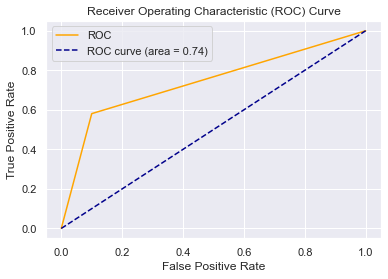

In [32]:
# Plotting the ROC Curve

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [33]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
# replacing zero values with the mean of the column

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())


In [35]:
# Removing the outliers using filters

q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [36]:
# Creating the Independent and Dependent variables set

X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [37]:
# Feature Scaling using StandardScaler
# Applicable when we have variables in different units

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [38]:
# Creating the Train-Test split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 0)

In [39]:
# Fitting the Logistic Regression model

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [40]:
# Calculating the predicted probability of Y=0 and Y=1

y_pred = log_reg.predict_proba(x_test)

In [41]:
y_pred

array([[0.03510792, 0.96489208],
       [0.84678222, 0.15321778],
       [0.91322826, 0.08677174],
       [0.33912479, 0.66087521],
       [0.88858228, 0.11141772],
       [0.96832143, 0.03167857],
       [0.24407587, 0.75592413],
       [0.13296925, 0.86703075],
       [0.59816215, 0.40183785],
       [0.64038946, 0.35961054],
       [0.41367963, 0.58632037],
       [0.02837929, 0.97162071],
       [0.73769456, 0.26230544],
       [0.83569512, 0.16430488],
       [0.90453976, 0.09546024],
       [0.86236113, 0.13763887],
       [0.1286852 , 0.8713148 ],
       [0.97855081, 0.02144919],
       [0.63175136, 0.36824864],
       [0.75269574, 0.24730426],
       [0.34839399, 0.65160601],
       [0.55157167, 0.44842833],
       [0.92007548, 0.07992452],
       [0.95379616, 0.04620384],
       [0.95390846, 0.04609154],
       [0.65731747, 0.34268253],
       [0.96396694, 0.03603306],
       [0.0831901 , 0.9168099 ],
       [0.90678068, 0.09321932],
       [0.8690392 , 0.1309608 ],
       [0.

In [48]:
pred=[]

for model in [log_reg]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1)
print('Combined test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Combined test roc-auc: 0.8601736972704714


In [49]:
pred

[0      0.964892
 1      0.153218
 2      0.086772
 3      0.660875
 4      0.111418
          ...   
 187    0.242111
 188    0.433373
 189    0.128673
 190    0.168372
 191    0.067136
 Length: 192, dtype: float64]

In [50]:
final_prediction

,0
0,0.964892
1,0.153218
2,0.086772
3,0.660875
4,0.111418
...,...
187,0.242111
188,0.433373
189,0.128673
190,0.168372


In [51]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.97162071, 0.97162071, 0.96489208, 0.9630115 , 0.92017613,
       0.9168099 , 0.8924058 , 0.88772751, 0.79011442, 0.78186928,
       0.73319   , 0.73011025, 0.6487632 , 0.6351718 , 0.63488458,
       0.61696334, 0.5816742 , 0.54740846, 0.5368729 , 0.53543381,
       0.50869818, 0.45033107, 0.44842833, 0.43844444, 0.43337307,
       0.43320339, 0.41750203, 0.35961054, 0.34502228, 0.34148794,
       0.3382149 , 0.33638518, 0.3351856 , 0.3343307 , 0.32118918,
       0.31836359, 0.31111451, 0.30272413, 0.28969789, 0.28405673,
       0.27924765, 0.26230544, 0.25670519, 0.24730426, 0.23383624,
       0.19554381, 0.19248507, 0.17372375, 0.17258873, 0.16430488,
       0.16165635, 0.14964389, 0.13927068, 0.01695302])

In [54]:
# Checking the optimal threshold value for maximum accuracy

from sklearn.metrics import accuracy_score

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
20,0.508698,0.796875
19,0.535434,0.796875
17,0.547408,0.796875
16,0.581674,0.796875
26,0.417502,0.791667


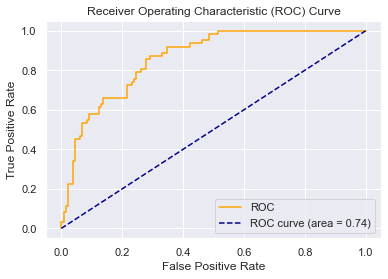

In [58]:
# Plotting the ROC Curve

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()